In [1]:
# newral network

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [4]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.17.0
Keras Version 3.5.0


In [7]:
mnist = tf.keras.datasets.mnist


In [20]:
(X_train_full , y_train_full) ,(X_test , y_test)  =  mnist.load_data()

In [21]:
X_train_full.shape

(60000, 28, 28)

In [22]:
X_train_full.dtype

dtype('uint8')

In [23]:
len(X_test[1][0])

28

In [24]:
# validation dataset 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.

In [25]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [26]:

X_test = X_test / 255.


In [27]:
len(X_train_full[5000:] )

55000

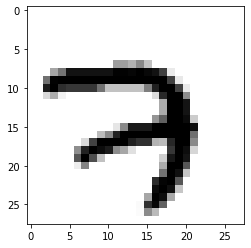

In [30]:
# Lets view some data 
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

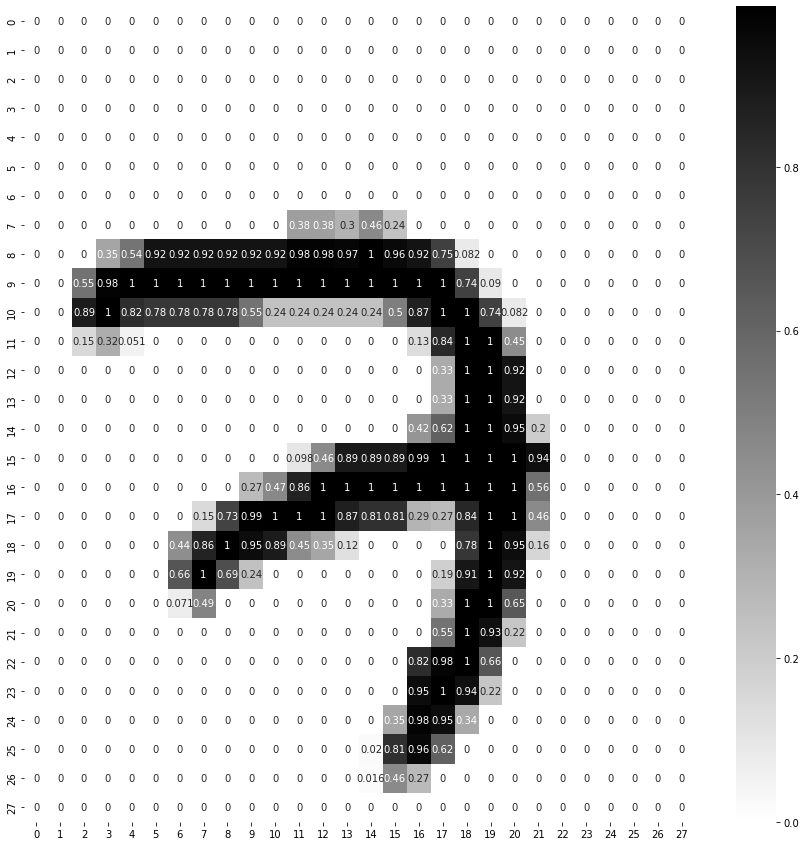

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [34]:
X_train.shape

(55000, 28, 28)

In [35]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

C:\Users\Pratik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [37]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [40]:
weights, biases = hidden1.get_weights()

In [41]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [42]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7258 - loss: 1.0485 - val_accuracy: 0.9158 - val_loss: 0.3095
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9120 - loss: 0.3126 - val_accuracy: 0.9312 - val_loss: 0.2445
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9286 - loss: 0.2513 - val_accuracy: 0.9404 - val_loss: 0.2124
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9396 - loss: 0.2128 - val_accuracy: 0.9472 - val_loss: 0.1812
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9486 - loss: 0.1812 - val_accuracy: 0.9544 - val_loss: 0.1640
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9541 - loss: 0.1609 - val_accuracy: 0.9608 - val_loss: 0.1479
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9591 - loss: 0.1462 - val_accuracy: 0.9624 - val_loss: 0.1335
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9628 - loss: 0.1323 - 

In [43]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

<Axes: >

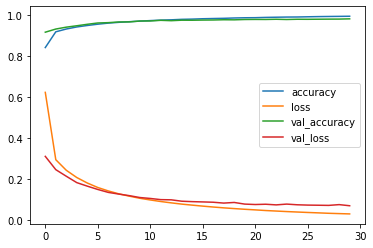

In [44]:
pd.DataFrame(history.history).plot()